In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from tqdm import tqdm

In [2]:
df = pd.read_csv("data/ClusterPercent.csv", sep="," , index_col=0)
df = df.drop(["sex","area","Total log time","Exam Performance"],axis=1)
df_values = df.values
weight = [2,2,2,2,2,1.5,1.5,1.5,1.5,1,1,1]

In [3]:
# calcola la matrice delle distanze tra ogni coppia di vettori del dataset
# ritorna un array 1-D in cui ogni valore è una distanza 
# (primo valore la distanza tra v1 e v2, secondo valore distanza tra v1 e v3, ecc.)

def weightedDistanceMatrix(X):
    distance_matrix = []
    for i in tqdm(range(0,len(X))):
        for j in range(i+1,len(X)):
            distance_matrix.append(np.abs(np.dot((X[i],X[j]),weight)))
    return distance_matrix

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 4181.93it/s]


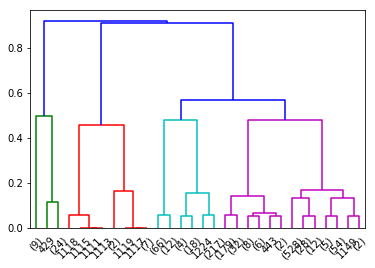

In [4]:
# esempio sulle prime 50 righe del dataset

df_values_cutted = df_values[0:50]

distance_cutted = weightedDistanceMatrix(df_values_cutted)
link = linkage(distance_cutted, method='average')
res = dendrogram(link,color_threshold=0.5, truncate_mode='lastp')